In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 데이터 불러오기 및 확인
df = pd.read_csv("C:/datasets/bodyPerformance.csv")
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [3]:
# 칼럼정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


<AxesSubplot: xlabel='height_cm', ylabel='weight_kg'>

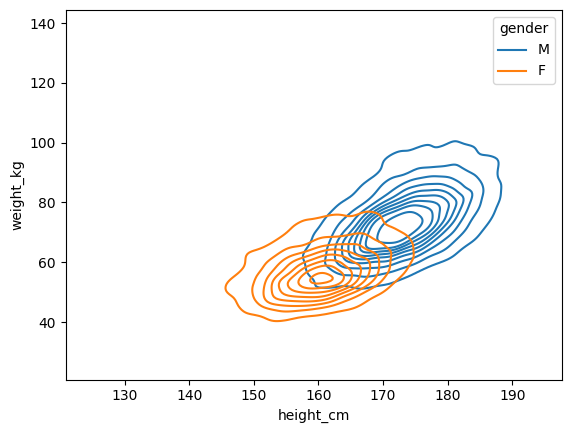

In [4]:
# 키에 따른 몸무게 (남여 구분 )시각화
sns.kdeplot(data=df, x='height_cm', y='weight_kg', hue='gender')

---

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [6]:
# 독립변수 ↔ 종속변수
df_x = df.drop(['gender', 'age', 'class'], axis=1)
df_y = df[['gender']]

# 정규화 스케일링
MinMaxScaler = MinMaxScaler()
df_minmax = MinMaxScaler.fit_transform(df_x)

# 칼럼명 결합
df_x = pd.DataFrame(data=df_minmax, columns=df_x.columns)
df_x.head()

,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,0.687500,0.437746,0.242706,0.512164,0.646766,0.778723,0.182353,0.7500,0.716172
1,0.581395,0.263864,0.168435,0.492958,0.626866,0.516312,0.173529,0.6625,0.755776
2,0.793605,0.462433,0.226790,0.588988,0.756219,0.635461,0.155462,0.6125,0.597360
3,0.719477,0.400716,0.204244,0.486556,0.731343,0.587234,0.168908,0.6625,0.722772
4,0.709302,0.370304,0.187003,0.448143,0.631841,0.617021,0.218908,0.5625,0.716172


In [7]:
# train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=10)

print("train data 개수 : ", len(x_train))
print("test data 개수 : ", len(x_test))

train data 개수 :  9375
test data 개수 :  4018


---

## 선형 판별분석

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [9]:
# 모델 생성 및 적합
LDA_1 = LinearDiscriminantAnalysis(store_covariance=True) # store_covariance 값이 True인 경우에만 공분산 행렬 제공 → LDA_1.covariance_[0]
LDA_1.fit(x_train, y_train)

# train and test
y_train_pred = LDA_1.predict(x_train)
y_test_pred = LDA_1.predict(x_test)

# Accuracy
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.9784533333333333
0.9810851169736187


In [10]:
# 모델의 Intercept 및 Coefficient 출력
print("Intercept : ", LDA_1.intercept_)
print("Coefficient : ", LDA_1.coef_)

Intercept :  [-14.29894437]
Coefficient :  [[ -1.35700815  26.12716198 -29.708912     4.0661269   10.03194981
   18.0750803  -57.34544185  -3.81399695  15.48677609]]


---

<AxesSubplot: xlabel='lda_component'>

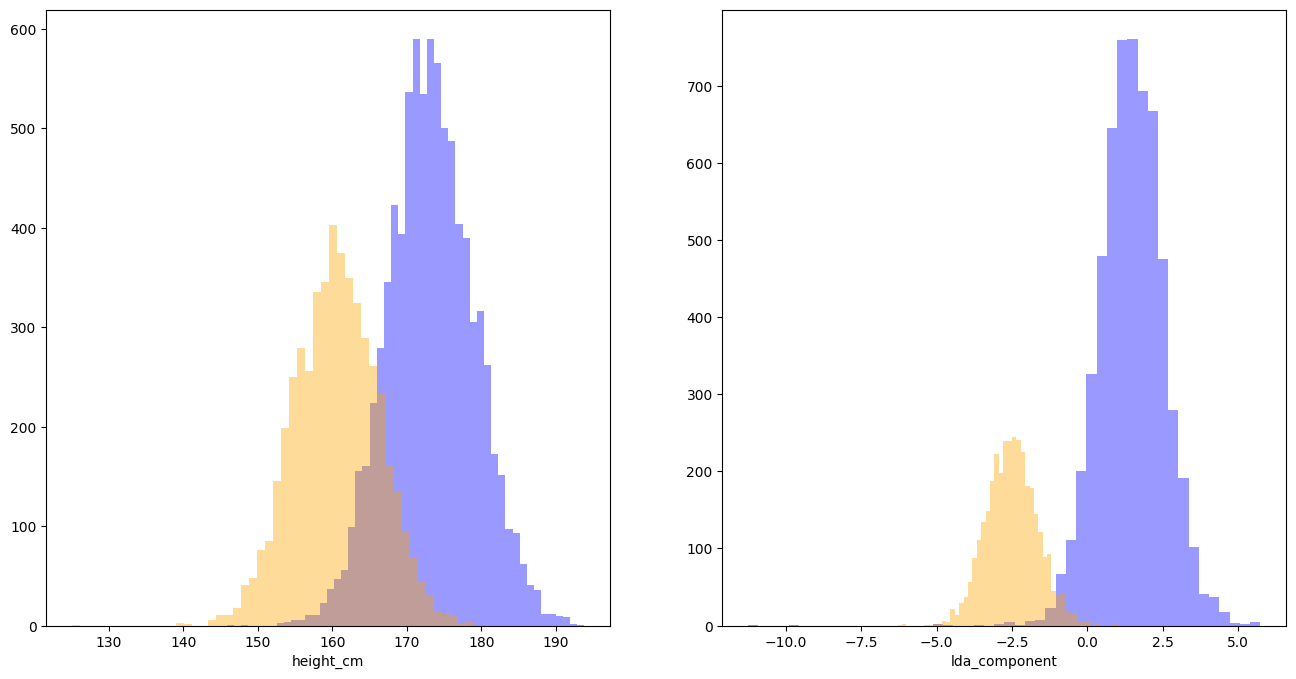

In [11]:
# 차원축소

# 주성분 1개로 설정
lda_com = LinearDiscriminantAnalysis(n_components=1)
lda_com.fit(x_train, y_train)

df_lda_com = lda_com.transform(x_train)
df_lda_component = pd.DataFrame(df_lda_com, columns=['lda_component'])

# 종속변수 데이터 index 초기화 및 결합
y_train_index = y_train.reset_index()
df_lda_component['target'] = y_train_index['gender']

# 차원축소 요소 분별력 비교 시각화 설정
fig, axs = plt.subplots(figsize=(16,8), ncols=2, nrows=1)

# 키 요소의 분별력
sns.distplot(df.loc[df['gender']=='M', 'height_cm'], hist=True, kde=False, color='blue', label='man', ax=axs[0])
sns.distplot(df.loc[df['gender']=='F', 'height_cm'], hist=True, kde=False, color='orange', label='woman', ax=axs[0])

# 차원축소 주성분의 분별력
sns.distplot(df_lda_component.loc[df_lda_component['target']=='M', 'lda_component'],hist=True, kde=False, color='blue', label='man', ax=axs[1])
sns.distplot(df_lda_component.loc[df_lda_component['target']=='F', 'lda_component'], hist=True, kde=False, color='orange', label='woman', ax=axs[1])


왼쪽에 비해서 오른쪽이 중복되는 공간이 작음

---

## 이차 판별분석

In [12]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [13]:
# 모델 생성 및 적합
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(x_train, y_train)

# train and test
qda_y_train_pred = qda.predict(x_train)
qda_y_test_pred = qda.predict(x_test)

# Accuracy
print(accuracy_score(y_train, qda_y_train_pred))
print(accuracy_score(y_test, qda_y_test_pred))

0.98048
0.9798407167745147


In [14]:
from sklearn.metrics import classification_report

In [15]:
# 성능 리포트 출력
print(classification_report(y_test, qda_y_test_pred))

              precision    recall  f1-score   support

           F       0.97      0.97      0.97      1463
           M       0.98      0.98      0.98      2555

    accuracy                           0.98      4018
   macro avg       0.98      0.98      0.98      4018
weighted avg       0.98      0.98      0.98      4018

